In [2]:
import numpy as np
import pandas as pd
import seaborn_image as isns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import sys

from skimage.io import imread
from skimage.io import imshow
from skimage.transform import resize
from skimage.util import crop



In [3]:
input_path = 'Alzheimer_s Dataset/train'
categories = ['NonDemented', 'VeryMildDemented', 'MildDemented', 'ModerateDemented'] #our labels

images = []
labels = []

numberofimages = []

#similar to rmarkdown to get file directories
for category in categories:
    numberofimages.append(len(os.listdir(os.path.join(input_path,category))))
    for file in os.listdir(os.path.join(input_path, category)):
        image_paths = os.path.join(input_path,category, file) #image in this case refers to title of the image
        image = imread(image_paths, as_gray=True) #reads an image, imread - image + read
        images.append(image)
        labels.append(category)


In [4]:
numberofimages

[2560, 1792, 717, 52]

In [5]:
nonDemented = images[1:2561]
veryMildDemented = images[2561:4353]
MildDemented = images[4353:5070]
ModerateDemented = images[5069:5122]

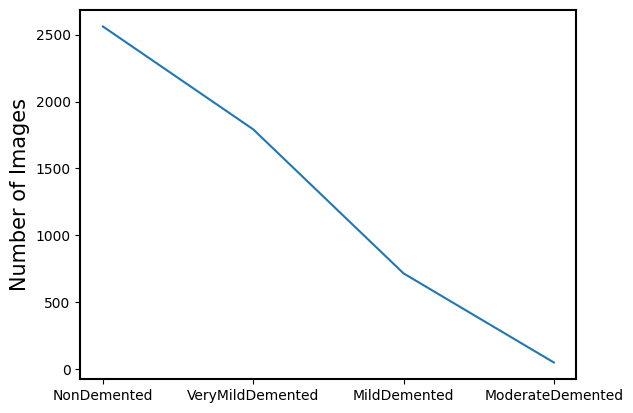

In [6]:
plt.plot(categories, numberofimages)
plt.ylabel('Number of Images')
plt.show()

Clearly shows that dataset is quite imbalanced so things can be done to increase the number of data like augmentation(flip images yada)

#Things to analyze
Shape of dataset1 and dataset2 --- pixels
Most important section of data(like can we somehow extract)
identity the progression of alzheimer maybe how much the white part increases in its mean for each stage

<AxesSubplot:>

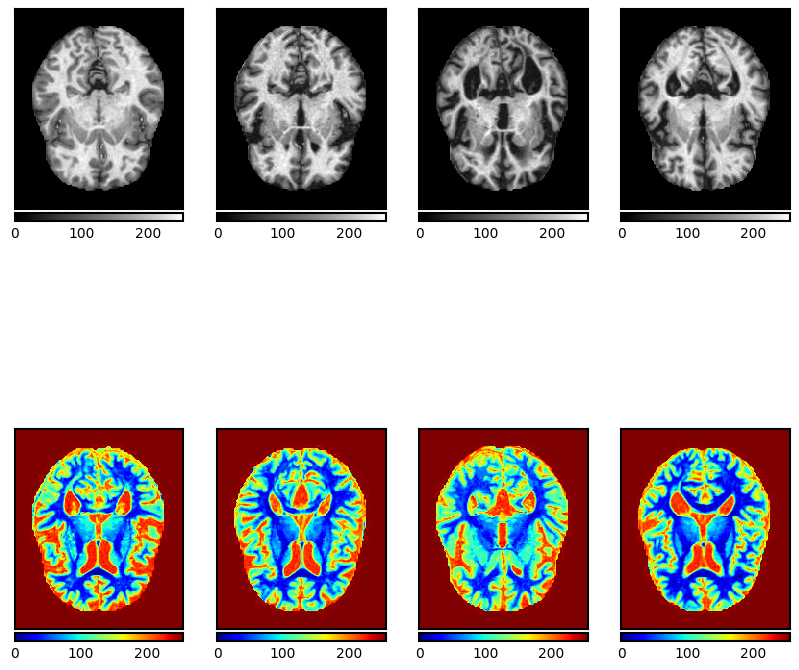

In [77]:
fig, axes = plt.subplots(2,4, figsize = (10,10))
isns.imgplot(nonDemented[1], gray= True, ax= axes[0,0], orientation= 'h')
isns.imgplot(veryMildDemented[1], gray= True, ax = axes[0,1],orientation= 'h')
isns.imgplot(MildDemented[1], gray = True, ax = axes[0,2],orientation= 'h')
isns.imgplot(ModerateDemented[1], gray = True, ax = axes[0,3],orientation= 'h')

#make it into rgb so can visualize better
isns.imgplot(np.invert(nonDemented[20]), gray= True, ax= axes[1,0], orientation= 'h', cmap = 'jet')
isns.imgplot(np.invert(veryMildDemented[20]), gray= True, ax = axes[1,1],orientation= 'h', cmap='jet')
isns.imgplot(np.invert(MildDemented[20]), gray = True, ax = axes[1,2],orientation= 'h', cmap = 'jet')
isns.imgplot(np.invert(ModerateDemented[20]), gray = True, ax = axes[1,3],orientation= 'h', cmap = 'jet')


using the first images as an example, its abit harder to differentiate between milddemented and moderate demented

In [8]:
isinstance(ModerateDemented, np.ndarray)

False

In [9]:
np.average(np.average(ModerateDemented, axis=0), axis = 1).shape

(208,)

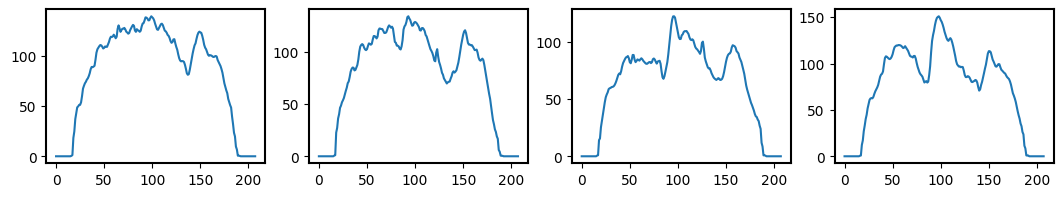

In [10]:
fig, axes = plt.subplots(1,4, figsize = (13,2))
axes[0].plot(nonDemented[1].mean(axis = 1))
axes[1].plot(veryMildDemented[1].mean(axis = 1))
axes[2].plot(MildDemented[1].mean(axis=1))
axes[3].plot(ModerateDemented[1].mean(axis=1))

average plot of our grayscale in each column for each picture above


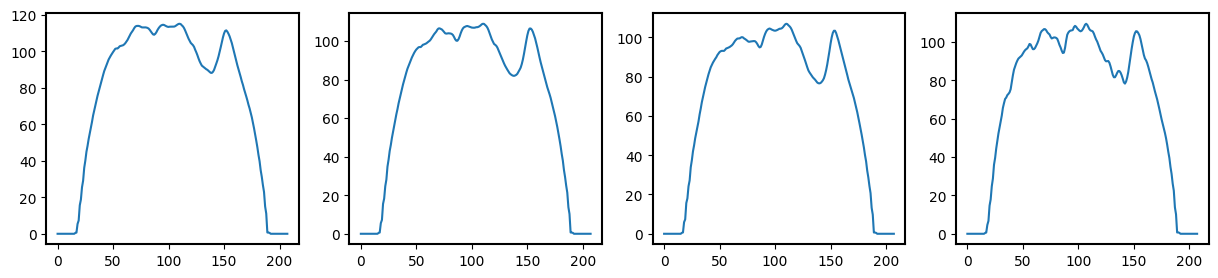

In [11]:
fig, axes = plt.subplots(1,4, figsize = (15,3))
axes[0].plot(np.average(np.average(nonDemented, axis=0), axis = 1))
axes[1].plot(np.average(np.average(veryMildDemented, axis=0), axis = 1))
axes[2].plot(np.average(np.average(MildDemented, axis=0), axis = 1))
axes[3].plot(np.average(np.average(ModerateDemented, axis=0), axis = 1))

plt.show()

meaningful x axis features = 50 to 170?
check the meaningful y matrix attributes -- pixels 40-130?

to do: overlay my subplots

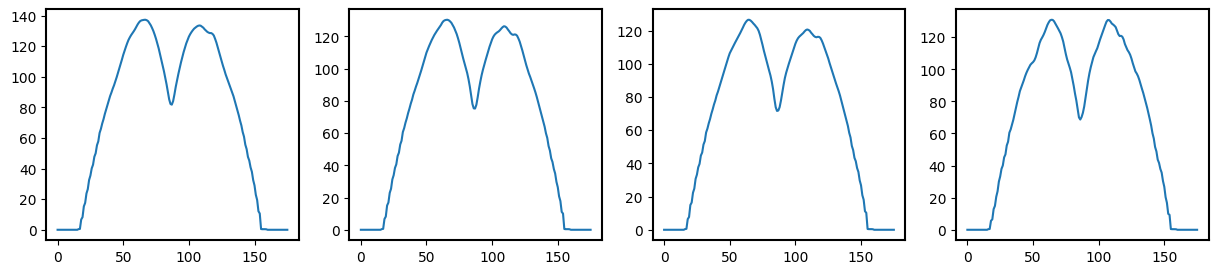

In [12]:
fig, axes = plt.subplots(1,4, figsize = (15,3))
axes[0].plot(np.average(np.average(nonDemented, axis=1), axis = 0))
axes[1].plot(np.average(np.average(veryMildDemented, axis=1), axis = 0))
axes[2].plot(np.average(np.average(MildDemented, axis=1), axis = 0))
axes[3].plot(np.average(np.average(ModerateDemented, axis=1), axis = 0))

calculating the total average grayscale -- aka average matrix is not insightful -- but we can identify the rough points where it might be insightful if we did an extraction

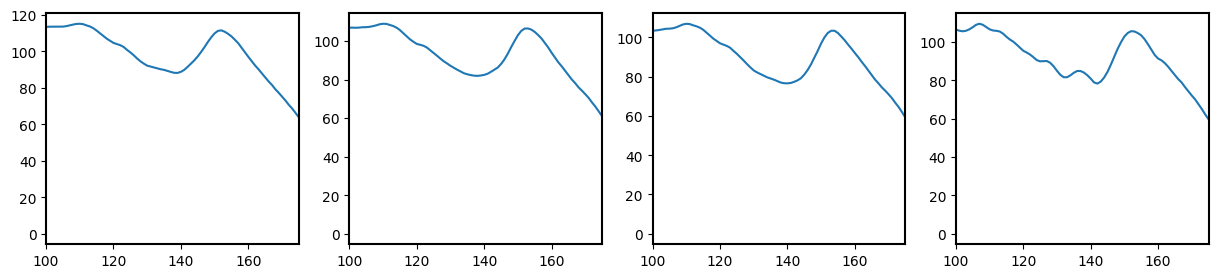

In [13]:
fig, axes = plt.subplots(1,4, figsize = (15,3))
axes[0].plot(np.average(np.average(nonDemented, axis=0), axis = 1))
axes[1].plot(np.average(np.average(veryMildDemented, axis=0), axis = 1))
axes[2].plot(np.average(np.average(MildDemented, axis=0), axis = 1))
axes[3].plot(np.average(np.average(ModerateDemented, axis=0), axis = 1))

plt.setp(axes, xlim = (100,175))
plt.show()

In [14]:
min(np.average(np.average(nonDemented, axis=0), axis = 1))

0.0

In [55]:
from skimage.color import rgb2hsv
from skimage.segmentation import chan_vese
import skimage as ski
from skimage import exposure

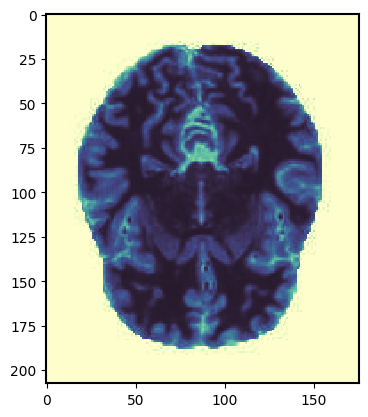

In [80]:
im1 = exposure.adjust_gamma(np.invert(nonDemented[1]),2)
plt.imshow(im1,)



In [101]:
im1 = exposure.adjust_gamma(np.invert(ModerateDemented[1]), 2)
im2 = exposure.adjust_gamma(np.invert(MildDemented[20]),-2)
#plt.imshow(im1, cmap = 'jet')
plt.imshow(im2, cmap = 'jet')

ValueError: Gamma should be a non-negative real number.

<AxesSubplot:>

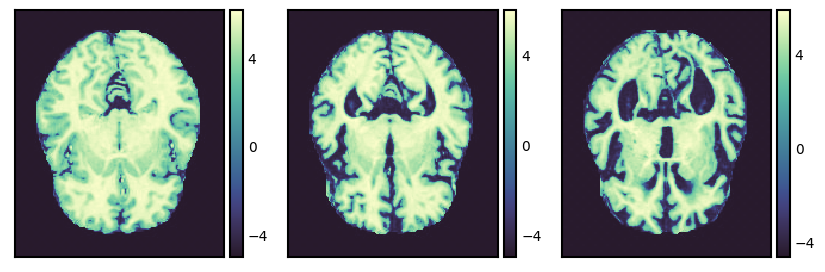

In [50]:

im1 = nonDemented[1]
im2 = ModerateDemented[1]
im3 = MildDemented[1]
cv = chan_vese(im1, mu=0.001, lambda1=1, lambda2=1, tol=1e-3,
               max_num_iter=200, dt=0.5, init_level_set="checkerboard",
               extended_output=True)
cv2 = chan_vese(im2, mu=0.001, lambda1=1, lambda2=1, tol=1e-3,
               max_num_iter=200, dt=0.5, init_level_set="checkerboard",
               extended_output=True)
cv3 = chan_vese(im3, mu=0.001, lambda1=1, lambda2=1, tol=1e-3,
               max_num_iter=200, dt=0.5, init_level_set="checkerboard",
               extended_output=True)
fig, axes = plt.subplots(1,3, figsize = (10,10))
isns.imshow(cv[1], ax = axes[0])
isns.imshow(cv2[1], ax = axes[1])
isns.imshow(cv3[1], ax = axes[2])